In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

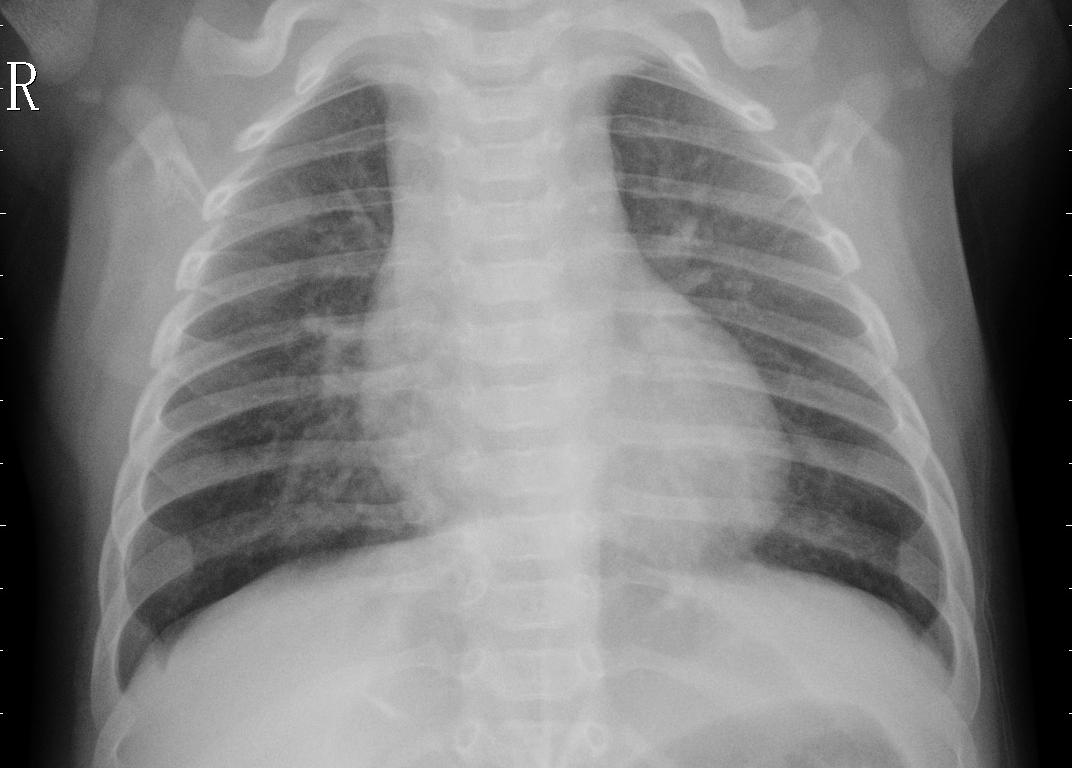

In [3]:
image = PIL.Image.open("data/train/PNEUMONIA/person1000_virus_1681.jpeg")
image

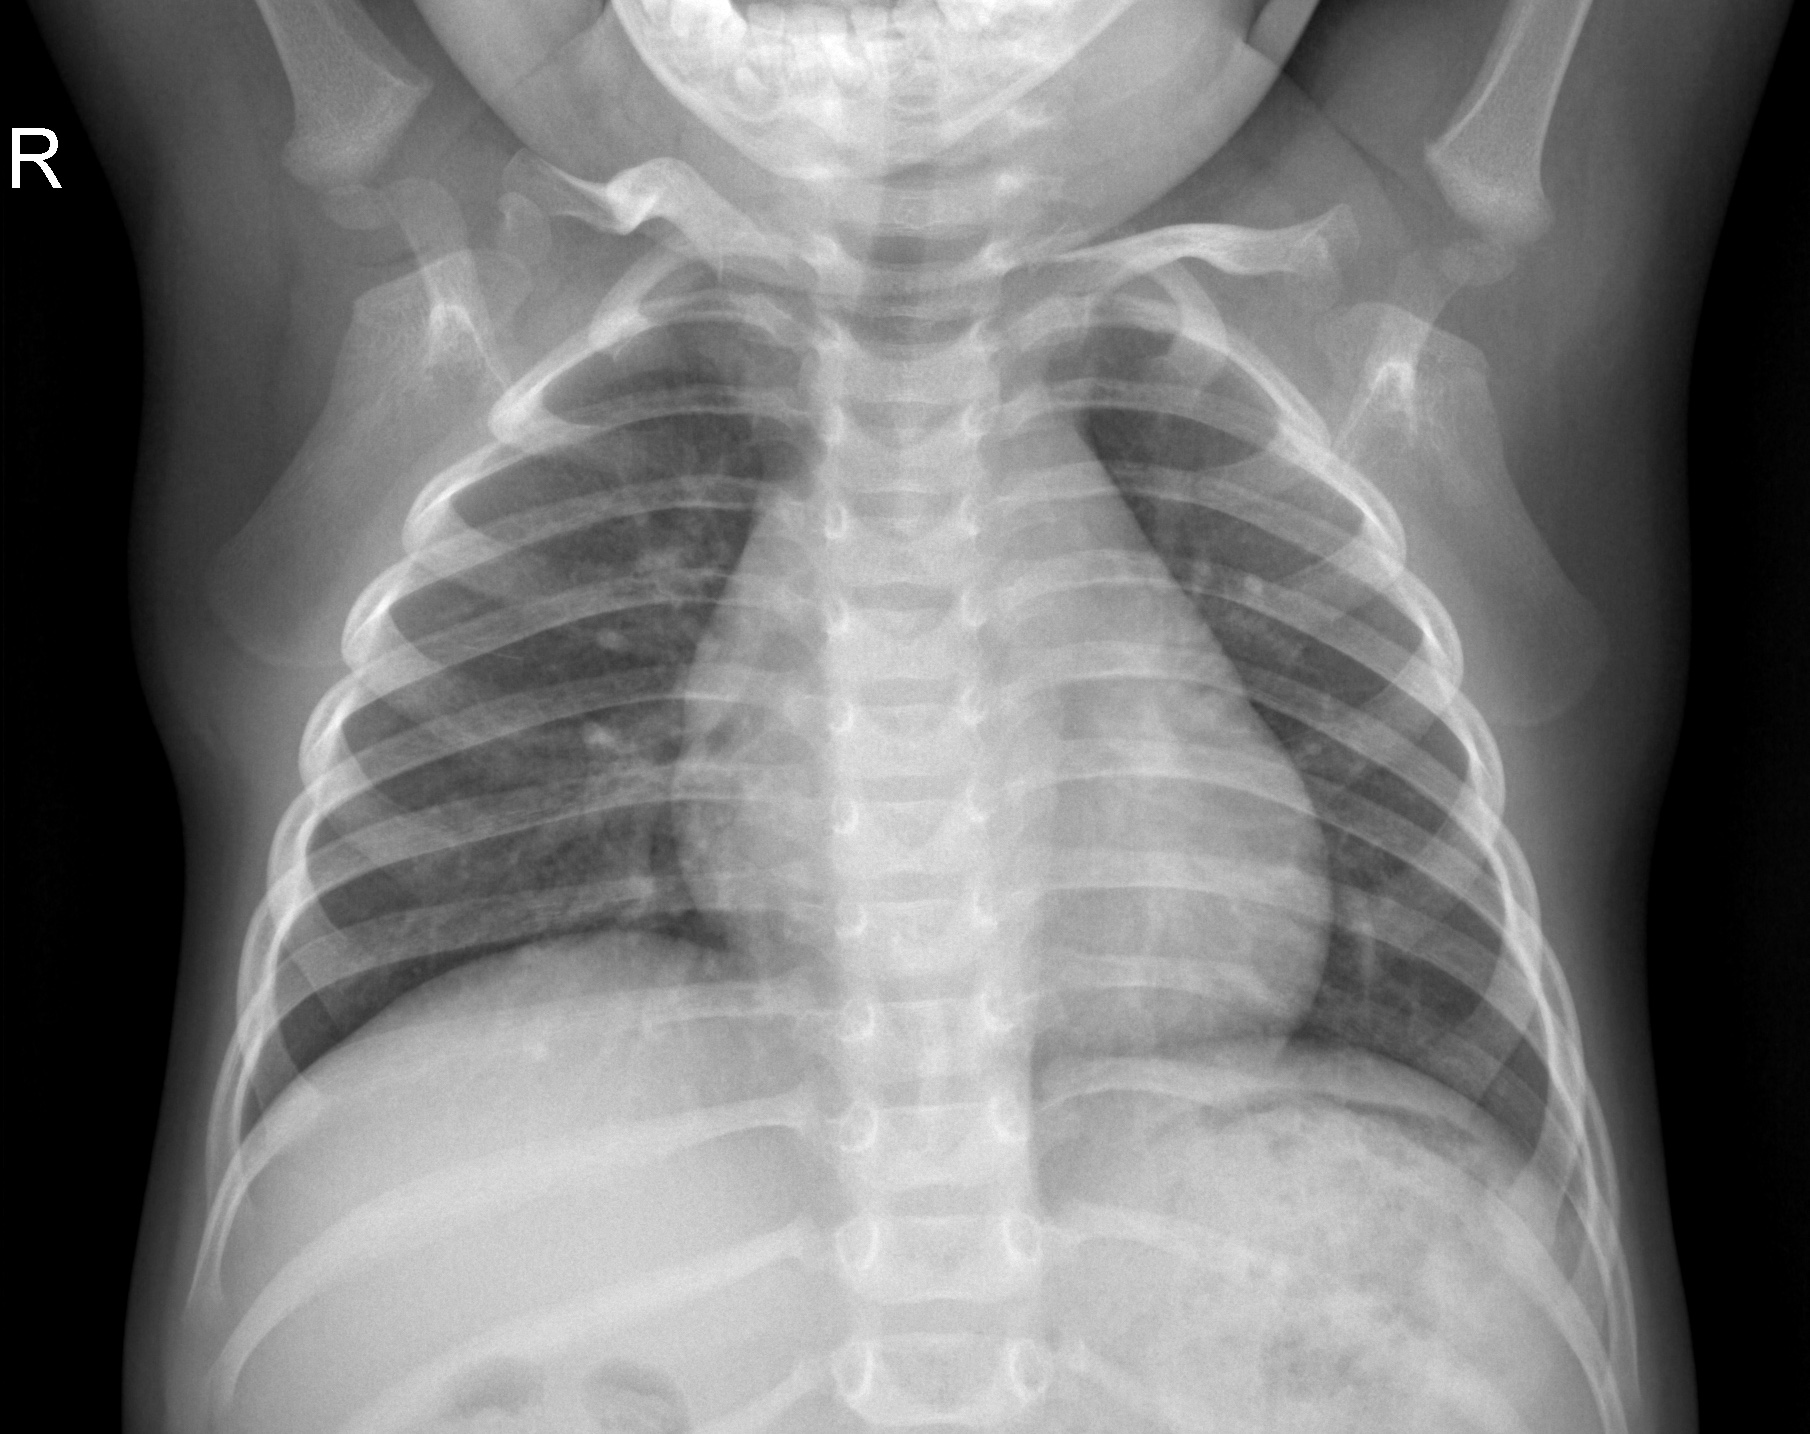

In [4]:
image_normal = PIL.Image.open("data/train/NORMAL/IM-0119-0001.jpeg")
image_normal

In [5]:
training_dir = "data/train/"
training_gen = ImageDataGenerator(rescale=1./255,)
data_train = training_gen.flow_from_directory(training_dir,target_size=(120,120),batch_size = 8, class_mode="binary")

Found 5216 images belonging to 2 classes.


In [6]:
valid_dir = "data/val/"
valid_gen = ImageDataGenerator(rescale=1./255,)
data_valid = valid_gen.flow_from_directory(valid_dir,target_size=(120,120),batch_size = 8, class_mode="binary")

Found 16 images belonging to 2 classes.


In [7]:
test_dir = "data/test/"
test_gen = ImageDataGenerator(rescale=1./255,)
y_test = test_gen.flow_from_directory(test_dir,target_size=(120,120),batch_size = 8, class_mode="binary")

Found 624 images belonging to 2 classes.



****CNN****

In [8]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3),input_shape = (120,120,3),activation="relu"),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3),activation="relu"),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128, (3,3),activation="relu"),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(256, (3,3),activation="relu"),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(512, (3,3),activation="relu"),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(256,activation = "relu"),
                             tf.keras.layers.Dense(1,activation="sigmoid")])

c:\Users\kamal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,700,161 (6.49 MB)

 Trainable params: 1,700,161 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy",metrics=["acc"])

In [11]:
history = model.fit(data_train, epochs = 4 , validation_data = data_valid, verbose = 1)

Epoch 1/4


c:\Users\kamal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


652/652 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - acc: 0.7767 - loss: 0.5126 - val_acc: 0.6250 - val_loss: 1.2657
Epoch 2/4
652/652 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - acc: 0.9271 - loss: 0.1744 - val_acc: 0.7500 - val_loss: 0.6522
Epoch 3/4
652/652 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - acc: 0.9597 - loss: 0.1050 - val_acc: 0.7500 - val_loss: 0.6534
Epoch 4/4
652/652 ━━━━━━━━━━━━━━━━━━━━ 50s 76ms/step - acc: 0.9698 - loss: 0.0827 - val_acc: 0.6250 - val_loss: 0.7909


In [12]:
model.evaluate(y_test)

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - acc: 0.7014 - loss: 1.0170


[1.0988883972167969, 0.6907051205635071]

In [13]:
predictions = model.predict(y_test)
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
predicted_classes

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [14]:
true_classes = y_test.classes  # classes réelles
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

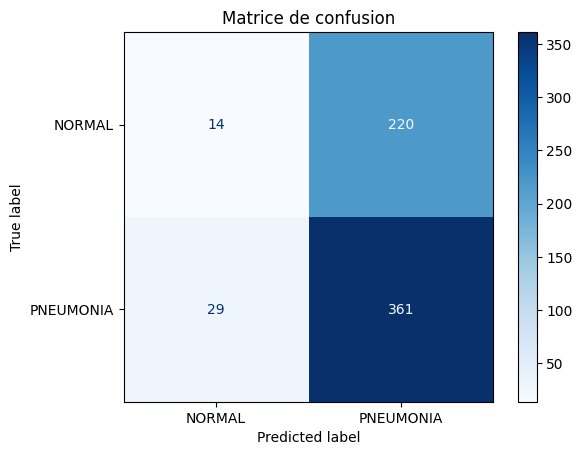

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NORMAL", "PNEUMONIA"])
disp.plot(cmap="Blues")
plt.title("Matrice de confusion")
plt.show()

In [16]:
from sklearn.metrics import classification_report

print(classification_report(true_classes, predicted_classes, target_names=["NORMAL", "PNEUMONIA"]))

              precision    recall  f1-score   support

      NORMAL       0.33      0.06      0.10       234
   PNEUMONIA       0.62      0.93      0.74       390

    accuracy                           0.60       624
   macro avg       0.47      0.49      0.42       624
weighted avg       0.51      0.60      0.50       624



In [17]:
model.save("chest_xray.h5")